# 6章　学習に関するテクニック

## 6.1.2 SGD

更新する重みは$\mathbf{W}$、$\mathbf{W}$に関する損失関数の勾配を$\frac{\partial L}{\partial W}$とします。 \
$\eta$は学習係数を表し、実際には0.01や0.001といった値を前もって決めて使用します。 \
また、式中の$\leftarrow$は、右辺の値で左辺の値を更新するという事を表します。 

\begin{aligned}
\mathbf{W} \leftarrow \mathbf{W}-\eta \frac{\partial L}{\partial W}
\end{aligned}

In [1]:
# 確率的勾配降下法（Stochastic Gradient Descent）
class SGD:

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 

## 6.1.3 SGDの欠点

SGDは単純で実装も簡単ですが、問題によっては非効率な場合があります。ここでは、SGDの欠点を指摘するにあたって、次の関数の最小値を求める問題を考えたいと思います。
\begin{aligned}
f(x,y) = \frac{1}{20}x^2 + y^2
\end{aligned}

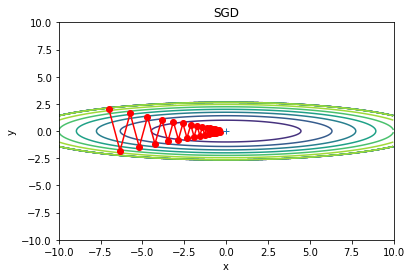

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
title = "SGD"

optimizer = SGD(lr=0.95)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)


x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y) 
Z = f(X, Y)

# for simple contour line  
mask = Z > 7
Z[mask] = 0

# plot 
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')
plt.title(title)
plt.xlabel("x")
plt.ylabel("y")
    
plt.show()

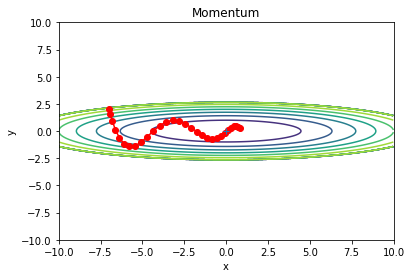

In [4]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


title = "Momentum"

optimizer = Momentum(lr=0.1)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)


x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y) 
Z = f(X, Y)

# for simple contour line  
mask = Z > 7
Z[mask] = 0

# plot 
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')
plt.title(title)
plt.xlabel("x")
plt.ylabel("y")
    
plt.show()

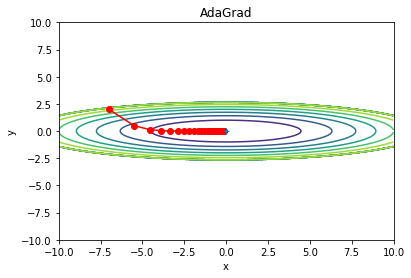

In [5]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


title = "AdaGrad"

optimizer = AdaGrad(lr=1.5)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)


x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y) 
Z = f(X, Y)

# for simple contour line  
mask = Z > 7
Z[mask] = 0

# plot 
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')
plt.title(title)
plt.xlabel("x")
plt.ylabel("y")
    
plt.show()

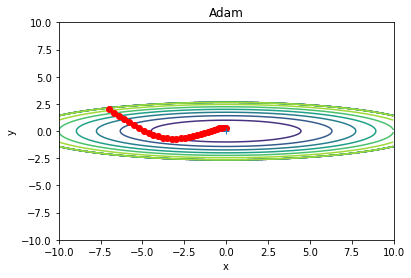

In [6]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


title = "Adam"

optimizer = Adam(lr=0.3)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)


x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y) 
Z = f(X, Y)

# for simple contour line  
mask = Z > 7
Z[mask] = 0

# plot 
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')
plt.title(title)
plt.xlabel("x")
plt.ylabel("y")
    
plt.show()

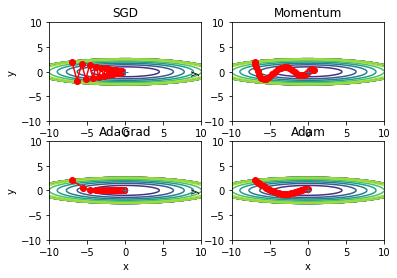

In [3]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()